<h1>Reconhecedor de Gatos com Regressão Logística e Gradiente Descendente</h1>

<h2> 1 - O problema </h2>

Reconhecer imagens de gatos com precisão de pelo menos 70% usando regressão logística com gradiente descendente.

<hr>
<h2> 2 - Descrição da arquitetura do algoritmo de aprendizado e seus parâmetros </h2>

<i>Entradas: <ul>
<li>a) Imagens de gatos (m = 209 = exemplos de treinamento; m_test = 50 = exemplos de teste) -> arrays manipuladas com o image2vector (x0, x1, ..., xn = px0, px1, ..., pxn)</li>
<li> a.1) Imagem de gato: 64x64x3 (altura, largura e RGB) = 12.288; y = 1 = gato; y = 0 = não é gato </li> 
<li> a.2) Cada imagem deve ser normalizada (pré-processamento) = /255 = limitar valores para a faixa de 0 a 1 </li> 
</ul>

<hr>
<i>Processamento: <ul>
<li>a) Pesos w0, w1, ..., wn = W | Wn = 12288 </li>
<li>b) Bias b = escalar real</li>
<li> c) Z = W.T * X + b </li>
</ul>

<hr>
<i>Saídas: <ul>
<li>a) Função Sigmoide de Z </li>
<li>a.1) Saída = a = simoide(Z)</li>
<li>b) Erro L = L(a, y) = -y * log(a) - (1-y) * log(1 - a)
<li>c) Custo = J = 1 / m * sum(L(a, y))
</ul>

<hr>
<i>Disposição dos parâmetros: <ul>
<li>a) Feedforward (Entrada-Processamento-Saída) </li>
<li>b) Backpropagation </li>
<li>b.1) dw = ∂J / ∂w = 1 / m * X * (A - Y).T </li>
<li>b.2) db = ∂J / ∂b = 1 / m * sum(a - y) </li>
<li>b.3) Otimização </li>
<li>b.3.1) w = w - taxa_de_aprendizado * dw </li>
<li>b.3.2) b = b - taxa_de_aprendizado * db </li>
<li>b.4) Previsão dos valores (predict) </li>
<li>b.4.1) Se A > 0.5, então A = 1; senão A = 0 </li>
</ul><br>

<hr>
*****Bibliotecas necessárias:
1. numpy para álgebra
2. h5py para datasets
3. matplotlib para plotagem
4. PIL para ler imagens
5. scipy para ler imagens
<hr>



<b>Fonte: deeplearning.ai</b><br><br>
<b> Este estudo foi realizado e transmitido via https://www.twitch.tv/andpower </b><br>
<b> Acesse o meu blog: http://ticomcc.blogspot.com.br </b> <br>
<b> Acesse o meu GitHub: https://github.com/Andygrammer </b>

In [256]:
# 1. Carregando as bibliotecas e os parâmetros x, y

import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], é um: cat.

 Número de exemplos de treinamento m: 209

 Número de exemplos de teste m_test: 50

 Dimensões de cada imagem de treinamento num_px_treinos: (64, 64, 3)

 Dimensões de cada imagem de teste num_px_testes: (64, 64, 3)


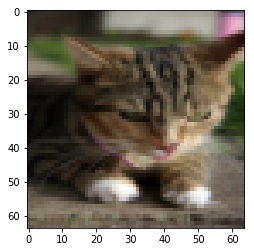

In [257]:
# 2. Verificando se o dataset foi carregado corretamente

indice = 104

plt.imshow(train_set_x_orig[indice])
print("y = " + str(train_set_y[:, indice]) + ", é um: " + classes[np.squeeze(train_set_y[:, indice])].decode("utf-8") + ".")

print("\n Número de exemplos de treinamento m: " + str(train_set_x_orig.shape[0]))
print("\n Número de exemplos de teste m_test: " + str(test_set_y.shape[1]))
print("\n Dimensões de cada imagem de treinamento num_px_treinos: (" + str(train_set_x_orig.shape[1]) + ", " + str(train_set_x_orig.shape[2]) + ", " + str(train_set_x_orig.shape[3]) + ")")
print("\n Dimensões de cada imagem de teste num_px_testes: (" + str(test_set_x_orig.shape[1]) + ", " + str(test_set_x_orig.shape[2]) + ", " + str(test_set_x_orig.shape[3]) + ")")

In [258]:
# 3. Normalizando os exemplos de treino/teste (209 x 64 x 64 x 3 para 12288 x 209) ; (50 x 64 x 64 x 3 para 12288 x 50)

treino_x_organizado = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
teste_x_organizado = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

treino_x_normalizado = treino_x_organizado / 255
teste_x_normalizado = teste_x_organizado / 255

In [259]:
# 4. Definindo a função Sigmoide

def sigmoide(Z):

    sigma = 1 / (1+np.exp(-Z))
    
    return sigma

# Testando a função
print("Teste de ativação Sigmoide: " + str(sigmoide(0.8)))

Teste de ativação Sigmoide: 0.689974481128


In [260]:
# 5. Inicializar os pesos

def inicializar_pesos(dimensao):
    w = np.zeros((dimensao, 1))
    b = 0
    return w, b

# Testando os pesos
w, b = inicializar_pesos(2)
print("w = " + str(w))
print("bias = " + str(b))

w = [[ 0.]
 [ 0.]]
bias = 0


In [261]:
# 6. Propagar para frente (feedforward) e para trás (backpropagation)

def propagar(w, b, X, Y):
    # Feedforward
    A = sigmoide(np.dot(w.T, X) + b)
    m = X.shape[1]
    custo = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    #Backpropagation
    dw = 1 / m * np.dot(X, (A - Y).T)
    db = 1 / m * np.sum(A - Y)
    
    gradientes = {"dw": dw,
                  "db": db}
    
    custo = np.squeeze(custo)
    
    return gradientes, custo
    
# Testando as propagações
w, b, X, Y = np.array([[1.], [2.]]), 2., np.array([[1., 2., -1.], [3., 4., -3.2]]), np.array([[1, 0, 1]])
gradientes, custo = propagar(w, b, X, Y)
print("dw = " + str(gradientes["dw"]))
print("db = " + str(gradientes["db"]))
print("custo = " + str(custo))

dw = [[ 0.99845601]
 [ 2.39507239]]
db = 0.00145557813678
custo = 5.80154531939


In [262]:
# 7. Otimizar os parâmetros

def otimizar(w, b, X, Y, numero_iteracoes, taxa_aprendizado):
    for i in range(numero_iteracoes):
        gradientes, custo = propagar(w, b, X, Y)
        
        #Derivadas
        dw = gradientes["dw"]
        db = gradientes["db"]
        
        w = w - taxa_aprendizado * dw
        b = b - taxa_aprendizado * db
        
        if( i % 100 == 0):
            print("Custo após a iteração: %i = %f" %(i, custo))
        
    return w, b, gradientes
        
        
    
# Testando as propagações
w, b, gradientes = otimizar(w, b, X, Y, numero_iteracoes = 100, taxa_aprendizado = 0.009)
print("w = " + str(w))
print("bias = " + str(b))
print("dw = " + str(gradientes["dw"]))
print("db = " + str(gradientes["db"]))

Custo após a iteração: 0 = 5.801545
w = [[ 0.19033591]
 [ 0.12259159]]
bias = 1.92535983008
dw = [[ 0.67752042]
 [ 1.41625495]]
db = 0.219194504541


In [263]:
# 8. Prevendo as saídas

def prever(w, b, X):
    m = X.shape[1]
    Y_previsoes = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoide(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if(A[0,i] > 0.5):
            Y_previsoes[0,i] = 1
        else:
            Y_previsoes[0,i] = 0
            
    return Y_previsoes

# Testando previsão
w = np.array([[0.1124579], [0.23106775]])
bias = -0.3
X = np.array([[1., -1.1, -3.2], [1.2, 2., 0.1]])
print("Previsões = " + str(prever(w, bias, X)))

Previsões = [[ 1.  1.  0.]]


In [267]:
# 9. Regressao

def regressao(X_train, Y_train, X_test, Y_test, numero_iteracoes, taxa_aprendizado):
    
    #9.1 - inicializar parâmetros
    w, b = inicializar_pesos(X_train.shape[0])
    
    #9.2 - calcular o gradiente descendente
    w, b, gradientes = otimizar(w, b, X_train, Y_train, numero_iteracoes, taxa_aprendizado)
    
    #9.3 - prever os valores de Y
    Y_previsoes_teste = prever(w, b, X_test)
    Y_previsoes_treino = prever(w, b, X_train)
    
    #9.4 - calcular a precisão do treino/teste
    print("Precisão do treinamento: {}%".format(100 - np.mean(np.abs(Y_previsoes_treino - Y_train)) * 100))
    print("Precisão do teste: {}%".format(100 - np.mean(np.abs(Y_previsoes_teste - Y_test)) * 100))
    
    elementos_regressao = {"custo" : custo,
                           "Y_previsoes_teste" : Y_previsoes_teste,
                           "Y_previsoes_treino" : Y_previsoes_treino,
                           "w" : w,
                           "b" : b}
    
    return elementos_regressao
    
# Testando regressão
elementos_regressao = regressao(treino_x_normalizado, train_set_y, teste_x_normalizado, test_set_y, numero_iteracoes = 2000, taxa_aprendizado = 0.005)

Custo após a iteração: 0 = 0.693147
Custo após a iteração: 100 = 0.584508
Custo após a iteração: 200 = 0.466949
Custo após a iteração: 300 = 0.376007
Custo após a iteração: 400 = 0.331463
Custo após a iteração: 500 = 0.303273
Custo após a iteração: 600 = 0.279880
Custo após a iteração: 700 = 0.260042
Custo após a iteração: 800 = 0.242941
Custo após a iteração: 900 = 0.228004
Custo após a iteração: 1000 = 0.214820
Custo após a iteração: 1100 = 0.203078
Custo após a iteração: 1200 = 0.192544
Custo após a iteração: 1300 = 0.183033
Custo após a iteração: 1400 = 0.174399
Custo após a iteração: 1500 = 0.166521
Custo após a iteração: 1600 = 0.159305
Custo após a iteração: 1700 = 0.152667
Custo após a iteração: 1800 = 0.146542
Custo após a iteração: 1900 = 0.140872
Precisão do treinamento: 99.04306220095694%
Precisão do teste: 70.0%


y = 1.0. Portanto, a sua imagem se trata de um: cat.


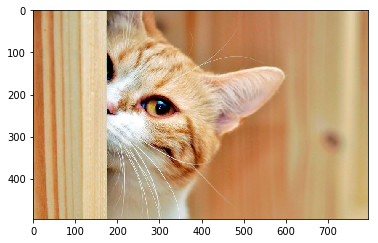

In [273]:
# 10. Extra - testando o seu próprio exemplo

minha_imagem = "Gato/gato4.jpg"

imagem_corrente = "exemplos/" + minha_imagem
imagem_array = np.array(ndimage.imread(imagem_corrente, flatten=False))
minha_imagem_padronizada = scipy.misc.imresize(imagem_array, size=(64, 64)).reshape((1, 64 * 64 * 3)).T
previsao = prever(elementos_regressao["w"], elementos_regressao["b"], minha_imagem_padronizada)

plt.imshow(imagem_array)
print("y = " + str(np.squeeze(previsao)) + ". Portanto, a sua imagem se trata de um: " + classes[int(np.squeeze(previsao)),].decode("utf-8") + ".")